In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [151]:
#importing data, spray data for the test set (2008,2010,2012,2014) is not provided. Therefore, spray info is not used for the analysis
train = pd.read_csv('./assets/train.csv')
test =pd.read_csv('./assets/test.csv')
weather = pd.read_csv('./assets/weather.csv')
spray =pd.read_csv('./assets/spray.csv')
mapdata = np.loadtxt("./assets/mapdata_copyright_openstreetmap_contributors.txt")

In [152]:
from datetime import datetime
train['Date'] = pd.to_datetime(train['Date'], format='%Y-%m-%d')
test['Date'] = pd.to_datetime(test['Date'], format='%Y-%m-%d')
weather['Date'] = pd.to_datetime(weather['Date'], format='%Y-%m-%d')
spray['Date'] = pd.to_datetime(spray['Date'], format='%Y-%m-%d')

In [153]:
train['week'] = train['Date'].dt.weekofyear
train['year'] = train['Date'].dt.year
test['week'] = test['Date'].dt.weekofyear
test['year'] = test['Date'].dt.year
spray['year']=spray['Date'].dt.year

In [154]:
Num = pd.Series(train.NumMosquitos)

In [155]:
train = train.drop(train[[1,3,4,5,6,9,10]], axis=1)

In [156]:
test =test.drop(test[[0,2,4,5,6,7,10]], axis=1)

In [157]:
train = pd.concat([train , pd.get_dummies(train['Species'])], axis=1)  

In [158]:
test = pd.concat([test , pd.get_dummies(test['Species'])], axis=1)  

In [159]:
test =test.drop(test[[1]], axis=1)
train =train.drop(train[[1]], axis=1)

In [160]:
w30 = pd.read_csv('weather_ave_30.csv')

In [161]:
w30 = w30.drop('Datetime_Date', axis=1)

In [162]:
w30['Date'] = pd.to_datetime(w30['Date'], format='%Y-%m-%d')

In [163]:
# Adding the weather data to the train and test data
train_add =train.join(w30.set_index('Date'), on='Date')
test_add = test.join(w30.set_index('Date'), on='Date')

In [164]:
train_add['UNSPECIFIED CULEX']= 0

In [165]:
y = Num

In [166]:
train_add = train_add.drop('WnvPresent', axis=1)

In [173]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.cross_validation import cross_val_score, StratifiedKFold ,train_test_split, KFold
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier, BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.grid_search import GridSearchCV

In [168]:
train_add.columns

Index([u'Date', u'Latitude', u'Longitude', u'week', u'year',
       u'CULEX ERRATICUS', u'CULEX PIPIENS', u'CULEX PIPIENS/RESTUANS',
       u'CULEX RESTUANS', u'CULEX SALINARIUS', u'CULEX TARSALIS',
       u'CULEX TERRITANS', u'Tmax', u'Tmin', u'Tavg', u'Depart', u'DewPoint',
       u'WetBulb', u'Heat', u'Cool', u'PrecipTotal', u'StnPressure',
       u'SeaLevel', u'ResultSpeed', u'ResultDir', u'AvgSpeed', u'HZ', u'VC',
       u'FU', u'BC', u'SQ', u'FG+', u'MI', u'TS', u'DZ', u'RA', u'BR', u'FG',
       u'SN', u'UNSPECIFIED CULEX'],
      dtype='object')

In [169]:
X =train_add[[u'Latitude', u'Longitude', u'week', u'year',
       u'CULEX ERRATICUS', u'CULEX PIPIENS', u'CULEX PIPIENS/RESTUANS',
       u'CULEX RESTUANS', u'CULEX SALINARIUS', u'CULEX TARSALIS',
       u'CULEX TERRITANS', u'Tmax', u'Tmin', u'Tavg', u'Depart', u'DewPoint',
       u'WetBulb', u'Heat', u'Cool', u'PrecipTotal', u'StnPressure',
       u'SeaLevel', u'ResultSpeed', u'ResultDir', u'AvgSpeed', u'HZ', u'VC',
       u'FU', u'BC', u'SQ', u'FG+', u'MI', u'TS', u'DZ', u'RA', u'BR', u'FG',
       u'SN', u'UNSPECIFIED CULEX']]

In [170]:
scaler = MinMaxScaler()
X= scaler.fit_transform(X)

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [59]:
##Grid search over Random Forest parameters
# model evaluation function
max_depths = [5,7]
max_features = [0.5,1.0]
n_estimators = [1000,2000]
rf = RandomForestRegressor(n_jobs=-1,random_state = 33,)
gsrf = GridSearchCV(estimator = rf,param_grid=dict(max_depth = max_depths, max_features=max_features,n_estimators=n_estimators), n_jobs=-1,cv=3, scoring='mean_squared_error')
gsrf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=-1, oob_score=False, random_state=33,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [1000, 2000], 'max_features': [0.5, 1.0], 'max_depth': [5, 7]},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_squared_error',
       verbose=0)

In [60]:
gsrf.best_params_

{'max_depth': 7, 'max_features': 1.0, 'n_estimators': 1000}

In [64]:
### adopting max depth
max_depths = [7,9]
max_features = [1.0]
n_estimators = [1000]
rf = RandomForestRegressor(n_jobs=-1,random_state = 33,)
gsrf = GridSearchCV(estimator = rf,param_grid=dict(max_depth = max_depths, max_features=max_features,n_estimators=n_estimators), n_jobs=-1,cv=3, scoring='mean_squared_error')
gsrf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=-1, oob_score=False, random_state=33,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [1000], 'max_features': [1.0], 'max_depth': [7, 9]},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_squared_error',
       verbose=0)

In [65]:
gsrf.best_params_

{'max_depth': 9, 'max_features': 1.0, 'n_estimators': 1000}

In [67]:
gsrf.best_score_

-116.8059786724713

In [149]:
rfr = RandomForestRegressor(max_depth=15, max_features=1.0, n_estimators=20000, n_jobs=-1,random_state = 33)
rfr.fit(X_train, y_train)

KeyboardInterrupt: 

In [85]:
y_pred = rfr.predict(X_test)

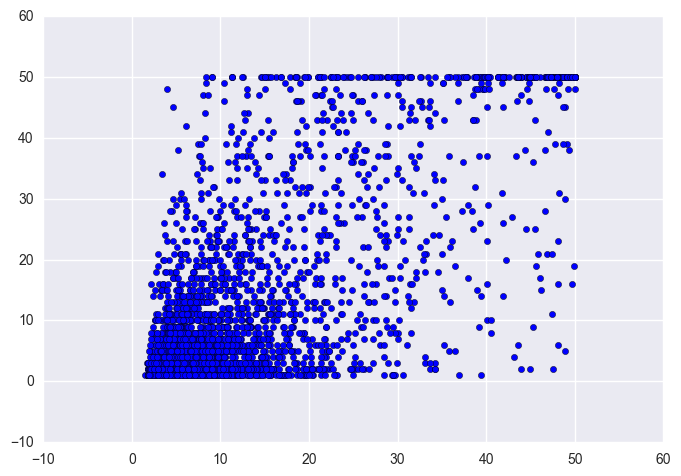

In [86]:
plt.scatter(x=y_pred, y=y_test)
plt.show()

In [177]:
y_train = y_train.apply(lambda x: 1 if x > 20 else 0)
y_test = y_test.apply(lambda x: 1 if x > 20 else 0)

In [93]:
##Grid search over Random Forest parameters
# model evaluation function
def evaluate_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    a = accuracy_score(y_test, y_pred)
    probabilities = model.predict_proba(X_test)
    #cm = confusion_matrix(y_test, y_pred)
    conmat = np.array(confusion_matrix(y_test, y_pred, labels=[1,0]))

    confusion = pd.DataFrame(conmat, index=['1', '0'],
                         columns=['predicted_1','predicted_0'])

    cr = classification_report(y_test, y_pred)
    
    print 'confusion matrix:'
    print confusion
    print 'classification_report:',cr
    print 'Accuracy of the model on test:',a
    return probabilities
#params = {'max_features ': [0.5,1.0],'max_depth':[0.5,1.0],'n_estimators':[5,10]}
max_depths = [15]
max_features = [1.0]
n_estimators = [1000]
rf = RandomForestClassifier(n_jobs=-1,random_state = 33, class_weight='balanced')
gsrf = GridSearchCV(estimator = rf,param_grid=dict(max_depth = max_depths, max_features=max_features,n_estimators=n_estimators), n_jobs=-1,cv=3, scoring='roc_auc')
gsrf.fit(X_train, y_train)
print 'best parameters for the model:',gsrf.best_params_
print 'best score on train:',gsrf.best_score_
probability = evaluate_model(gsrf.best_estimator_)

best parameters for the model: {'max_features': 1.0, 'n_estimators': 1000, 'max_depth': 15}
best score on train: 0.883242388324
confusion matrix:
   predicted_1  predicted_0
1          533          250
0          202         2482
classification_report:              precision    recall  f1-score   support

          0       0.91      0.92      0.92      2684
          1       0.73      0.68      0.70       783

avg / total       0.87      0.87      0.87      3467

Accuracy of the model on test: 0.869627920392


best parameters for the model: {'max_features': 1.0, 'n_estimators': 1000, 'max_depth': 15}
best score on train: 0.883242388324
confusion matrix:
   predicted_1  predicted_0
1          533          250
0          202         2482
classification_report:              precision    recall  f1-score   support

          0       0.91      0.92      0.92      2684
          1       0.73      0.68      0.70       783

avg / total       0.87      0.87      0.87      3467

Accuracy of the model on test: 0.869627920392

In [145]:
##Grid search over Random Forest parameters
# model evaluation function
def evaluate_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    a = accuracy_score(y_test, y_pred)
    probabilities = model.predict_proba(X_test)
    #cm = confusion_matrix(y_test, y_pred)
    conmat = np.array(confusion_matrix(y_test, y_pred, labels=[1,0]))

    confusion = pd.DataFrame(conmat, index=['1', '0'],
                         columns=['predicted_1','predicted_0'])

    cr = classification_report(y_test, y_pred)
    
    print 'confusion matrix:'
    print confusion
    print 'classification_report:',cr
    print 'Accuracy of the model on test:',a
    return probabilities
#params = {'max_features ': [0.5,1.0],'max_depth':[0.5,1.0],'n_estimators':[5,10]}
max_depths = [15]
max_features = [0.1,0.3,0.8]
n_estimators = [100,500]
rf = RandomForestClassifier(n_jobs=-1,random_state = 33, class_weight='balanced')
gsrf = GridSearchCV(estimator = rf,param_grid=dict(max_depth = max_depths, max_features=max_features,n_estimators=n_estimators), n_jobs=-1,cv=3, scoring='precision')
gsrf.fit(X_train, y_train)
print 'best parameters for the model:',gsrf.best_params_
print 'best score on train:',gsrf.best_score_
probability = evaluate_model(gsrf.best_estimator_)

best parameters for the model: {'max_features': 0.8, 'n_estimators': 500, 'max_depth': 15}
best score on train: 0.703481556811
confusion matrix:
   predicted_1  predicted_0
1          529          254
0          196         2488
classification_report:              precision    recall  f1-score   support

          0       0.91      0.93      0.92      2684
          1       0.73      0.68      0.70       783

avg / total       0.87      0.87      0.87      3467

Accuracy of the model on test: 0.870204788001


In [181]:
test_add = test_add.drop('Date',axis=1)

In [182]:
scaler =  StandardScaler()
test_add = scaler.fit_transform(test_add)

In [146]:
preds = gsrf.best_estimator_.predict(test_add)

In [147]:
series =  pd.Series(preds)

In [148]:
series.value_counts()

0    116293
dtype: int64

In [179]:
##Grid search over Random Forest parameters
# model evaluation function
def evaluate_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    a = accuracy_score(y_test, y_pred)
    probabilities = model.predict_proba(X_test)
    #cm = confusion_matrix(y_test, y_pred)
    conmat = np.array(confusion_matrix(y_test, y_pred, labels=[1,0]))

    confusion = pd.DataFrame(conmat, index=['1', '0'],
                         columns=['predicted_1','predicted_0'])

    cr = classification_report(y_test, y_pred)
    
    print 'confusion matrix:'
    print confusion
    print 'classification_report:',cr
    print 'Accuracy of the model on test:',a
    return probabilities
#params = {'max_features ': [0.5,1.0],'max_depth':[0.5,1.0],'n_estimators':[5,10]}
max_features = [0.3,0.7,1.0]
n_estimators = [100,1000]
gb = GradientBoostingClassifier(random_state = 33)
gsgb = GridSearchCV(estimator = gb,param_grid=dict(max_features=max_features,n_estimators=n_estimators), n_jobs=-1,cv=3, scoring='roc_auc')
gsgb.fit(X_train, y_train)
print 'best parameters for the model:',gsgb.best_params_
print 'best score on train:',gsgb.best_score_
probability = evaluate_model(gsgb.best_estimator_)

 best parameters for the model: {'max_features': 0.7, 'n_estimators': 1000}
best score on train: 0.900323552095
confusion matrix:
   predicted_1  predicted_0
1          481          302
0          147         2537
classification_report:              precision    recall  f1-score   support

          0       0.89      0.95      0.92      2684
          1       0.77      0.61      0.68       783

avg / total       0.86      0.87      0.87      3467

Accuracy of the model on test: 0.870493221806


In [183]:
preds = gsgb.best_estimator_.predict(test_add)

In [216]:
preds_prob = gsgb.best_estimator_.predict_proba(test_add)

In [222]:
series =  pd.DataFrame(preds_prob)

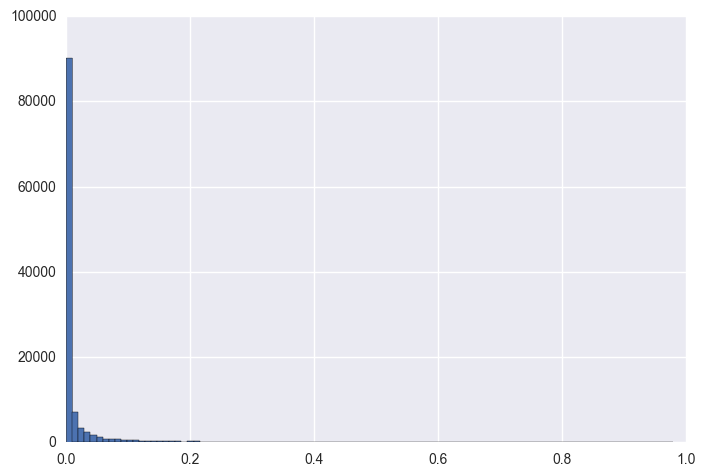

In [230]:
plt.hist(series[1], bins=100)
plt.show()

In [309]:
series_count = series[1].apply(lambda x: 1 if x > 0.5 else 0)

In [310]:
series_count.value_counts()

0    114623
1      1670
Name: 1, dtype: int64

In [311]:
series_Test = series_count

In [312]:
series_Train = y.apply(lambda x: 1 if x > 20 else 0)

In [313]:
series_Train.value_counts()

0    8185
1    2321
Name: NumMosquitos, dtype: int64

In [305]:
series_Test

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
116263    0
116264    0
116265    0
116266    0
116267    0
116268    0
116269    0
116270    0
116271    0
116272    0
116273    0
116274    0
116275    0
116276    0
116277    0
116278    0
116279    0
116280    0
116281    0
116282    0
116283    0
116284    0
116285    0
116286    0
116287    0
116288    0
116289    0
116290    0
116291    0
116292    0
Name: 1, dtype: int64

In [314]:
series_Test = pd.Series(series_Test)
series_Train = pd.Series(series_Train)

In [315]:
series_Test.to_csv('TEST_COLUMN.csv')

In [316]:
series_Train.to_csv('TRAIN_COLUMN.csv')

In [ ]:
##Grid search over Gradiant boosting
# model evaluation function
def evaluate_model(model):
   model.fit(X_train, y_train)
   y_pred = model.predict(X_test)
   
   a = accuracy_score(y_test, y_pred)
   probabilities = model.predict_proba(X_test)
   #cm = confusion_matrix(y_test, y_pred)
   conmat = np.array(confusion_matrix(y_test, y_pred, labels=[1,0]))

   confusion = pd.DataFrame(conmat, index=['1', '0'],
                        columns=['predicted_1','predicted_0'])

   cr = classification_report(y_test, y_pred)
   
   print 'confusion matrix:'
   print confusion
   print 'classification_report:'
   print cr
   print 'Accuracy of the model on test:',a
   return probabilities
#params = {'max_features ': [0.5,1.0],'max_depth':[0.5,1.0],'n_estimators':[5,10]}
max_depths = [0.3, 1.0]
max_features = [0.3,1.0]
n_estimators = [5000]

gbc = GradientBoostingClassifier(random_state = 33)
gsgbc = GridSearchCV(estimator = gbc,param_grid=dict(max_depth = max_depths, max_features=max_features,n_estimators=n_estimators), n_jobs=-1,cv=3,scoring='roc_auc')
gsgbc.fit(X_train, y_train)
print 'best parameters for the model:',gsgbc.best_params_
print 'best score on train:',gsgbc.best_score_
probability = evaluate_model(gsgbc.best_estimator_)

[3:49]  
probabilities_gbc = gsgbc.best_estimator_.predict_proba(test_add)
pro_gbc =probabilities_gbc[:,1]

[3:49]  
pro_gbc = pd.Series(pro_gbc)
submit= pd.concat([test['Id'], pro_gbc], axis= 1)
submit.columns=['Id','WnvPresent']
submit.to_csv('gbc_pro.csv',index = False)

array([[ 0.98789108, -1.33004502, -1.59156888, ...,  0.27213675,
         1.84097825,  0.        ],
       [ 0.98789108, -1.33004502, -1.59156888, ...,  0.27213675,
         1.84097825,  0.        ],
       [ 0.98789108, -1.33004502, -1.59156888, ...,  0.27213675,
         1.84097825,  0.        ],
       ..., 
       [ 0.71546931,  0.74435097,  1.84138838, ...,  0.59927414,
         0.72093512,  0.        ],
       [ 0.71546931,  0.74435097,  1.84138838, ...,  0.59927414,
         0.72093512,  0.        ],
       [ 0.71546931,  0.74435097,  1.84138838, ...,  0.59927414,
         0.72093512,  0.        ]])

In [ ]:
test_add